In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print(f'Running on a TPU w/{tpu.num_accelerators()["TPU"]} cores')
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

Tensorflow version 2.15.0
Running on a TPU w/8 cores


In [ ]:
import tensorflow as tf

training_dataset, validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/lion_no_lion/set 1',
    batch_size=32,
    validation_split=0.2,
    subset='both',
    seed=42,
    shuffle=True,
    image_size=(224, 224),
)

Found 841 files belonging to 2 classes.
Using 673 files for training.
Using 168 files for validation.


In [ ]:
with tpu_strategy.scope():
  base_model = tf.keras.applications.Xception(
      weights='imagenet',
      include_top=False,
      input_shape=(224, 224, 3)
  )

  base_model.trainable = False

  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
      optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
history = model.fit(
    training_dataset,
    epochs=300,
    validation_data=validation_dataset,
    callbacks=[
        tf.keras.callbacks.TensorBoard(log_dir='logs')
    ]
)

Epoch 1/300
22/22 [==============================] - 42s 1s/step - loss: 3.9553 - accuracy: 0.5721 - val_loss: 2.4449 - val_accuracy: 0.5714
Epoch 2/300
22/22 [==============================] - 10s 152ms/step - loss: 2.3881 - accuracy: 0.5305 - val_loss: 2.0634 - val_accuracy: 0.5536
Epoch 3/300
22/22 [==============================] - 5s 148ms/step - loss: 1.9593 - accuracy: 0.5661 - val_loss: 1.8123 - val_accuracy: 0.5893
Epoch 4/300
22/22 [==============================] - 5s 170ms/step - loss: 1.6961 - accuracy: 0.5884 - val_loss: 1.6552 - val_accuracy: 0.5952
Epoch 5/300
22/22 [==============================] - 5s 142ms/step - loss: 1.5287 - accuracy: 0.6062 - val_loss: 1.5523 - val_accuracy: 0.6012
Epoch 6/300
22/22 [==============================] - 5s 159ms/step - loss: 1.4161 - accuracy: 0.6270 - val_loss: 1.4569 - val_accuracy: 0.5655
Epoch 7/300
22/22 [==============================] - 4s 150ms/step - loss: 1.3165 - accuracy: 0.6374 - val_loss: 1.3948 - val_accuracy: 0.5893


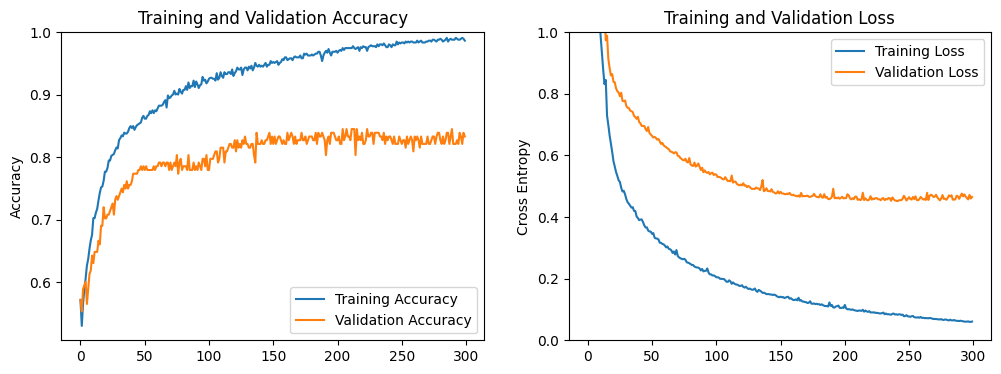

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 8s 8s/step


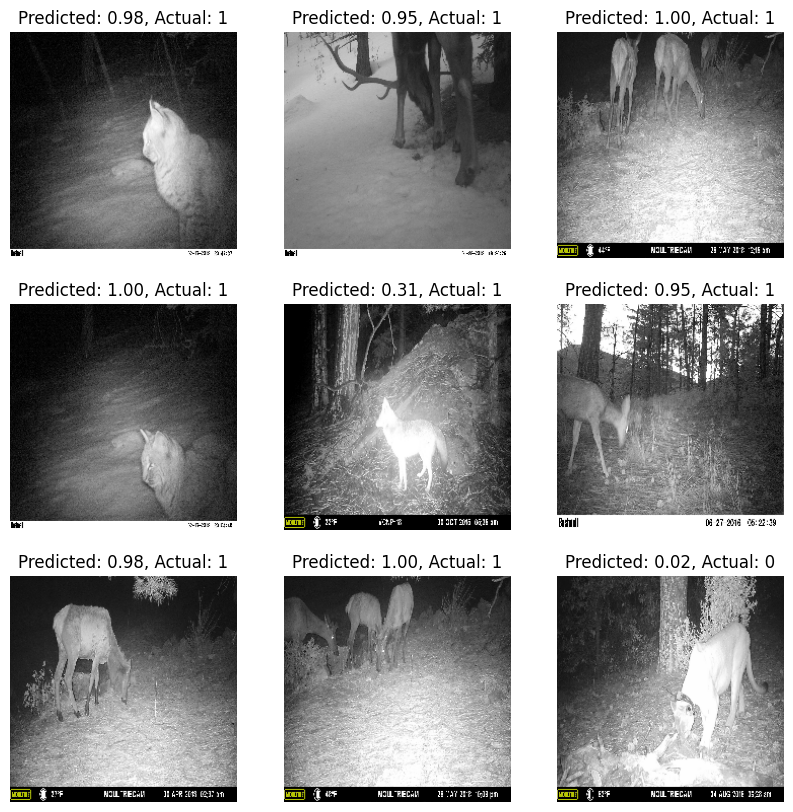

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images from the validation set
images, labels = next(iter(validation_dataset))

# Predict the labels for the images
predictions = model.predict(images)

# Plot the images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(images[i].numpy().astype("uint8"))
  plt.title(f"Predicted: {predictions[i][0]:.2f}, Actual: {labels[i]}")
  plt.axis('off')

plt.show()


**Next Steps**:

- XCeption Model
  1. Try on bigger dataset (set 2)
  2. Try with preloaded weights and random weights
  3. Image resolution
  4. Augmentation
- Model from scratch; Convolutinonal Neural Network
  1. Image resolution
  2. Augmentation
- Compelling images of when the model succedes or fails

**Calculations**:

1. XCeption; imagenet; set 1; 224x224; no augmentation
1. XCeption; imagenet; set 1; 224x224; with augmentation
1. XCeption; imagenet; set 1; 512x512; no augmentation
1. XCeption; imagenet; set 1; 512x512; with augmentation
1. XCeption; imagenet; set 1; 1024s1024; no augmentation
1. XCeption; imagenet; set 1; 1024s1024; with augmentation
1. XCeption; imagenet; set 2; 224x224; no augmentation
1. XCeption; imagenet; set 2; 224x224; with augmentation
1. XCeption; imagenet; set 2; 512x512; no augmentation
1. XCeption; imagenet; set 2; 512x512; with augmentation
1. XCeption; imagenet; set 2; 1024s1024; no augmentation
1. XCeption; imagenet; set 2; 1024s1024; with augmentation
1. XCeption; random; set 1; 224x224; no augmentation
1. XCeption; random; set 1; 224x224; with augmentation
1. XCeption; random; set 1; 512x512; no augmentation
1. XCeption; random; set 1; 512x512; with augmentation
1. XCeption; random; set 1; 1024s1024; no augmentation
1. XCeption; random; set 1; 1024s1024; with augmentation
1. XCeption; random; set 2; 224x224; no augmentation
1. XCeption; random; set 2; 224x224; with augmentation
1. XCeption; random; set 2; 512x512; no augmentation
1. XCeption; random; set 2; 512x512; with augmentation
1. XCeption; random; set 2; 1024s1024; no augmentation
1. XCeption; random; set 2; 1024s1024; with augmentation